# EDA with Pandas - Cumulative Lab

## Introduction

In this section, you've learned a lot about importing, cleaning up, analyzing (using descriptive statistics) and visualizing data. In this cumulative lab, you'll get a chance to practice all of these skills with the Ames Housing dataset, which contains information about home sales in Ames, Iowa between 2006 and 2010.

## Objectives

You will be able to:

* Practice loading data with pandas
* Practice calculating measures of centrality and dispersion with pandas
* Practice creating subsets of data with pandas
* Practice using data visualizations to explore data, and interpreting those visualizations
* Perform a full exploratory data analysis process to gain insight about a dataset 

## Your Task: Explore the Ames Housing Dataset with Pandas

![aerial photo of a neighborhood](images/neighborhood_aerial.jpg)

Photo by <a href="https://unsplash.com/@mattdonders?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Matt Donders</a> on <a href="/@mattdonders?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>



### Data Understanding

Each record (row) in this dataset represents a home that was sold in Ames, IA.

Each feature (column) in this dataset is some attribute of that home sale. You can view the file `data/data_description.txt` in this repository for a full explanation of all variables in this dataset — 80 columns in total.

We are going to focus on the following features:

**SalePrice**: `Sale price of the house in dollars`

**TotRmsAbvGrd**: `Total rooms above grade (does not include bathrooms)`

**OverallCond**: `Rates the overall condition of the house`
```
       10	Very Excellent
       9	 Excellent
       8	 Very Good
       7	 Good
       6	 Above Average	
       5	 Average
       4	 Below Average	
       3	 Fair
       2	 Poor
       1	 Very Poor
```

**YrSold**: `Year Sold (YYYY)`

**YearBuilt**: `Original construction date`

**LandSlope**: `Slope of property`
```
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
```

### Requirements

In this lab you will use your data munging and visualization skills to conduct an exploratory analysis of the dataset.

#### 1. Load the Dataset with Pandas

Import pandas with the standard alias `pd` and load the data into a dataframe with the standard name `df`.

#### 2. Explore Data Distributions

Produce summary statistics, visualizations, and interpretive text describing the distributions of `SalePrice`, `TotRmsAbvGrd`, and `OverallCond`.

#### 3. Explore Differences between Subsets

Separate the data into subsets based on `OverallCond`, then demonstrate how this split impacts the distribution of `SalePrice`.

#### 4. Explore Correlations

Find the features that have the strongest positive and negative correlations with `SalePrice`, and produce plots representing these relationships.

#### 5. Engineer and Explore a New Feature

Create a new feature `Age`, which represents the difference between the year sold and the year built, and plot the relationship between the age and sale price.

## 1. Load the Dataset with Pandas

In the cell below, import:
* `pandas` with the standard alias `pd`
* `matplotlib.pyplot` with the standard alias `plt`

And set `%matplotlib inline` so the graphs will display immediately below the cell that creates them.

In [2]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Now, use pandas to open the file located at `data/ames.csv` ([documentation here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)). Specify the argument `index_col=0` in order to avoid creating an extra `Id` column. Name the resulting dataframe `df`.

In [3]:
# Your code here
df = pd.read_csv('data/ames.csv', index_col=0)

The following code checks that you loaded the data correctly:

In [4]:
# Run this cell without changes

# Check that df is a dataframe
assert type(df) == pd.DataFrame

# Check that there are the correct number of rows
assert df.shape[0] == 1460

# Check that there are the correct number of columns
# (if this crashes, make sure you specified `index_col=0`)
assert df.shape[1] == 80

Inspect the contents of the dataframe:

In [5]:
# Run this cell without changes
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [6]:
# Run this cell without changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

## 2. Explore Data Distributions

Write code to produce histograms showing the distributions of `SalePrice`, `TotRmsAbvGrd`, and `OverallCond`.

Each histogram should have appropriate title and axes labels, as well as a black vertical line indicating the mean of the dataset. See the documentation for [plotting histograms](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.hist.html), [customizing axes](https://matplotlib.org/stable/api/axes_api.html#axis-labels-title-and-legend), and [plotting vertical lines](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.axvline.html#matplotlib.axes.Axes.axvline) as needed.

### Sale Price

In the cell below, produce a histogram for `SalePrice`.

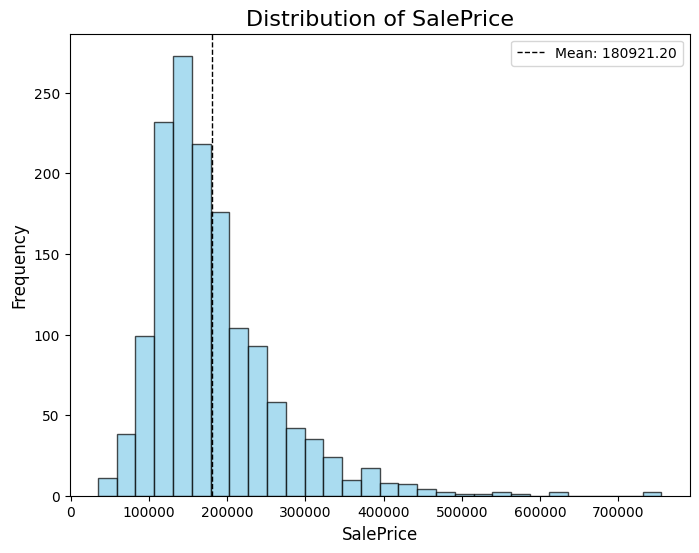

In [7]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(df['SalePrice'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of SalePrice', fontsize=16)
plt.xlabel('SalePrice', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

mean_price = df['SalePrice'].mean()
plt.axvline(mean_price, color='black', linestyle='dashed', linewidth=1, label=f'Mean: {mean_price:.2f}')

plt.legend()

plt.show()


Now, print out the mean, median, and standard deviation:

In [19]:
# Your code here
mean_price = df['SalePrice'].mean()
median_price = df['SalePrice'].median()
std_dev_price = df['SalePrice'].std()

print(f"Mean SalePrice: {mean_price:.2f}")
print(f"Median SalePrice: {median_price:.2f}")
print(f"Standard Deviation of SalePrice: {std_dev_price:.2f}")

Mean SalePrice: 180921.20
Median SalePrice: 163000.00
Standard Deviation of SalePrice: 79442.50


In the cell below, interpret the above information.

In [9]:
# Replace None with appropriate text
"""
The mean SalePrice represents the average sale price of houses in the dataset, while the median provides the middle value, showing where 50% of the values lie below and 50% lie above. The median being lower than the mean suggests a right-skewed distribution, likely caused by a few high-priced houses pulling the mean upward. The standard deviation quantifies the spread of the data, indicating the degree of variation in house prices. A higher standard deviation reflects greater variability, showing that house prices in the dataset vary significantly.

"""

'\nThe mean SalePrice represents the average sale price of houses in the dataset, while the median provides the middle value, showing where 50% of the values lie below and 50% lie above. The median being lower than the mean suggests a right-skewed distribution, likely caused by a few high-priced houses pulling the mean upward. The standard deviation quantifies the spread of the data, indicating the degree of variation in house prices. A higher standard deviation reflects greater variability, showing that house prices in the dataset vary significantly.\n\n'

### Total Rooms Above Grade

In the cell below, produce a histogram for `TotRmsAbvGrd`.

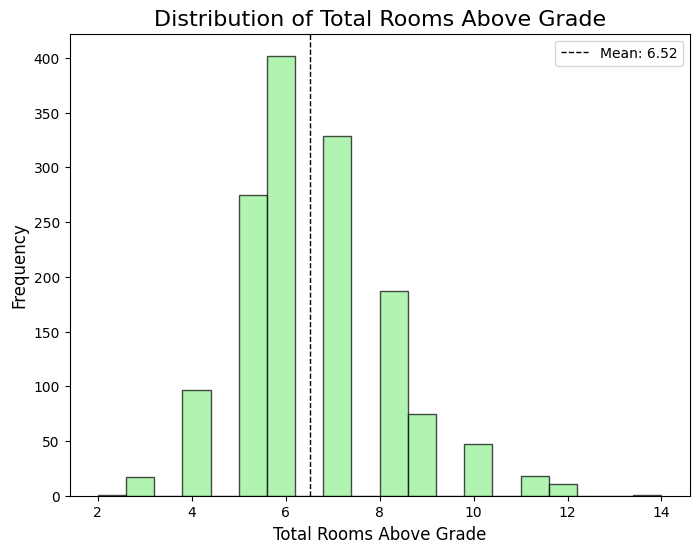

In [10]:
# Your code here
plt.figure(figsize=(8, 6))
plt.hist(df['TotRmsAbvGrd'], bins=20, color='lightgreen', edgecolor='black', alpha=0.7)
plt.title('Distribution of Total Rooms Above Grade', fontsize=16)
plt.xlabel('Total Rooms Above Grade', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

mean_rooms = df['TotRmsAbvGrd'].mean()
plt.axvline(mean_rooms, color='black', linestyle='dashed', linewidth=1, label=f'Mean: {mean_rooms:.2f}')

plt.legend()

plt.show()

Now, print out the mean, median, and standard deviation:

In [17]:
# Your code here
mean_rooms = df['TotRmsAbvGrd'].mean()
median_rooms = df['TotRmsAbvGrd'].median()
std_dev_rooms = df['TotRmsAbvGrd'].std()

print(f"Mean Total Rooms Above Grade: {mean_rooms:.2f}")
print(f"Median Total Rooms Above Grade: {median_rooms:.2f}")
print(f"Standard Deviation of Total Rooms Above Grade: {std_dev_rooms:.2f}")

Mean Total Rooms Above Grade: 6.52
Median Total Rooms Above Grade: 6.00
Standard Deviation of Total Rooms Above Grade: 1.63


In the cell below, interpret the above information.

In [18]:
# Replace None with appropriate text
"""
The mean Total Rooms Above Grade represents the average number of rooms in houses across the dataset. The median indicates the middle value, showing where 50% of the houses have fewer rooms and 50% have more. If the median is close to the mean, it suggests the distribution is relatively symmetrical. However, if the mean is significantly higher than the median, it indicates a right-skewed distribution, possibly due to some houses having a very high number of rooms. The standard deviation reflects the variability in the number of rooms, with a higher value indicating a greater range of room counts among houses in the dataset.

"""

'\nThe mean Total Rooms Above Grade represents the average number of rooms in houses across the dataset. The median indicates the middle value, showing where 50% of the houses have fewer rooms and 50% have more. If the median is close to the mean, it suggests the distribution is relatively symmetrical. However, if the mean is significantly higher than the median, it indicates a right-skewed distribution, possibly due to some houses having a very high number of rooms. The standard deviation reflects the variability in the number of rooms, with a higher value indicating a greater range of room counts among houses in the dataset.\n\n'

### Overall Condition

In the cell below, produce a histogram for `OverallCond`.

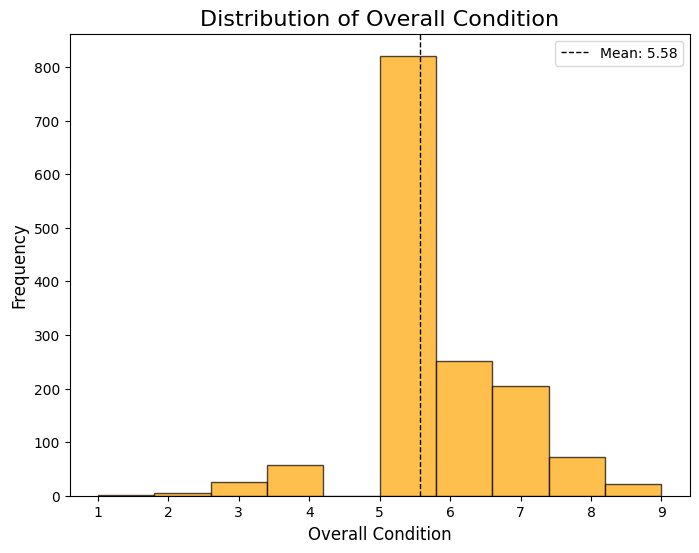

In [13]:
# Your code here
plt.figure(figsize=(8, 6))
plt.hist(df['OverallCond'], bins=10, color='orange', edgecolor='black', alpha=0.7)
plt.title('Distribution of Overall Condition', fontsize=16)
plt.xlabel('Overall Condition', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

mean_condition = df['OverallCond'].mean()
plt.axvline(mean_condition, color='black', linestyle='dashed', linewidth=1, label=f'Mean: {mean_condition:.2f}')

plt.legend()

plt.show()

Now, print out the mean, median, and standard deviation:

In [15]:
# Your code here
mean_condition = df['OverallCond'].mean()
median_condition = df['OverallCond'].median()
std_dev_condition = df['OverallCond'].std()

print(f"Mean Overall Condition: {mean_condition:.2f}")
print(f"Median Overall Condition: {median_condition:.2f}")
print(f"Standard Deviation of Overall Condition: {std_dev_condition:.2f}")

Mean Overall Condition: 5.58
Median Overall Condition: 5.00
Standard Deviation of Overall Condition: 1.11


In the cell below, interpret the above information.

In [16]:
# Replace None with appropriate text
"""
The mean Overall Condition indicates the average rating of the overall condition of houses in the dataset. The median provides the middle value, showing that 50% of the houses have a condition rating below this value and 50% have a rating above it. If the mean and median are close, the distribution is likely symmetric. A larger standard deviation suggests greater variability in the condition ratings, while a smaller standard deviation indicates that most houses have similar condition ratings. Since condition ratings are typically categorical or ordinal, it’s important to note that statistical measures like the mean might not fully capture the distribution's nature.

"""

"\nThe mean Overall Condition indicates the average rating of the overall condition of houses in the dataset. The median provides the middle value, showing that 50% of the houses have a condition rating below this value and 50% have a rating above it. If the mean and median are close, the distribution is likely symmetric. A larger standard deviation suggests greater variability in the condition ratings, while a smaller standard deviation indicates that most houses have similar condition ratings. Since condition ratings are typically categorical or ordinal, it’s important to note that statistical measures like the mean might not fully capture the distribution's nature.\n\n"

## 3. Explore Differences between Subsets

As you might have noted in the previous step, the overall condition of the house seems like we should treat it as more of a categorical variable, rather than a numeric variable.

One useful way to explore a categorical variable is to create subsets of the full dataset based on that categorical variable, then plot their distributions based on some other variable. Since this dataset is traditionally used for predicting the sale price of a house, let's use `SalePrice` as that other variable.

In the cell below, create three variables, each of which represents a record-wise subset of `df` (meaning, it has the same columns as `df`, but only some of the rows).

* `below_average_condition`: home sales where the overall condition was less than 5
* `average_condition`: home sales where the overall condition was exactly 5
* `above_average_condition`: home sales where the overall condition was greater than 5

In [20]:
# Replace None with appropriate code
below_average_condition = df[df['OverallCond'] < 5]
average_condition = df[df['OverallCond'] == 5]
above_average_condition = df[df['OverallCond'] > 5]

print(f"Below average condition: {below_average_condition.shape[0]} records")
print(f"Average condition: {average_condition.shape[0]} records")
print(f"Above average condition: {above_average_condition.shape[0]} records")


Below average condition: 88 records
Average condition: 821 records
Above average condition: 551 records


The following code checks that you created the subsets correctly:

In [21]:
# Run this cell without changes

# Check that all of them still have 80 columns
assert below_average_condition.shape[1] == 80
assert average_condition.shape[1] == 80
assert above_average_condition.shape[1] == 80

# Check the numbers of rows of each subset
assert below_average_condition.shape[0] == 88
assert average_condition.shape[0] == 821
assert above_average_condition.shape[0] == 551

The following code will produce a plot of the distributions of sale price for each of these subsets:

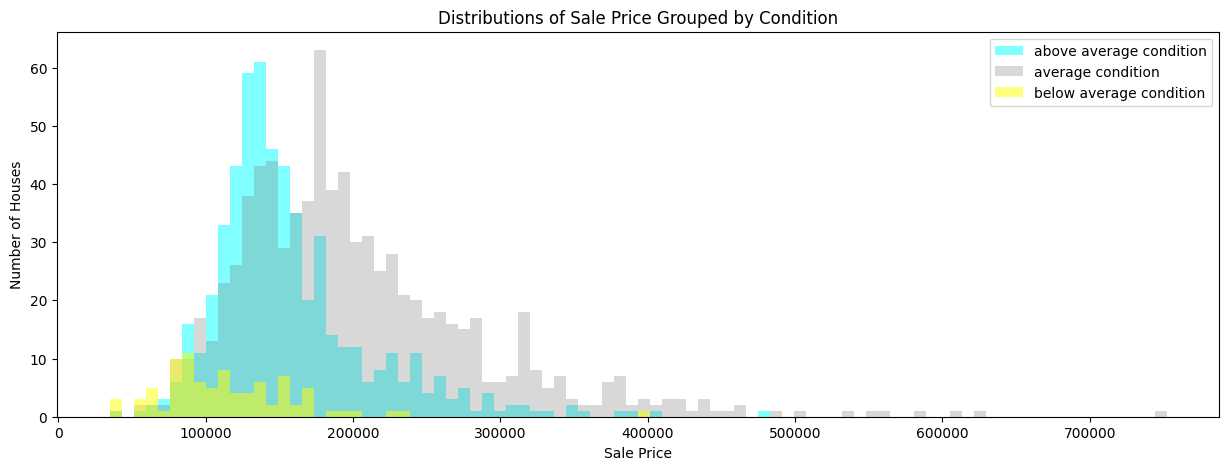

In [22]:
# Run this cell without changes

# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Create custom bins so all are on the same scale
bins = range(df["SalePrice"].min(), df["SalePrice"].max(), int(df["SalePrice"].median()) // 20)

# Plot three histograms, with reduced opacity (alpha) so we
# can see them overlapping
ax.hist(
    x=above_average_condition["SalePrice"],
    label="above average condition",
    bins=bins,
    color="cyan",
    alpha=0.5
)
ax.hist(
    x=average_condition["SalePrice"],
    label="average condition",
    bins=bins,
    color="gray",
    alpha=0.3
)
ax.hist(
    x=below_average_condition["SalePrice"],
    label="below average condition",
    bins=bins,
    color="yellow",
    alpha=0.5
)

# Customize labels
ax.set_title("Distributions of Sale Price Grouped by Condition")
ax.set_xlabel("Sale Price")
ax.set_ylabel("Number of Houses")
ax.legend();

Interpret the plot above. What does it tell us about these overall condition categories, and the relationship between overall condition and sale price? Is there anything surprising?

In [23]:
# Replace None with appropriate text
"""
Above Average Condition:
Houses with above-average overall condition (OverallCond > 5) tend to cluster around lower sale prices, typically between $100,000 and $200,000.
The distribution is relatively narrow, with fewer high-priced homes in this category.
This suggests that above-average condition does not necessarily correlate with higher sale prices. It may indicate that many well-maintained houses are smaller or in more affordable price ranges.

Average Condition:
Houses with average overall condition (OverallCond = 5) exhibit the widest range of sale prices, with the majority falling between $100,000 and $300,000.
This category contains a significant portion of higher-priced homes, with a long tail extending into higher price ranges.
This suggests that houses in "average condition" can still sell for high prices, possibly due to other factors like location, size, or features.

Below Average Condition:
Houses with below-average condition (OverallCond < 5) tend to have the lowest sale prices, clustering around $100,000 to $150,000.
Very few houses in this category sell for higher prices.
This pattern aligns with expectations that homes in poor condition are typically less valuable and may require repairs or renovations.

Relationship Between Condition and Sale Price
The plot suggests that overall condition does not have a straightforward correlation with sale price.

Surprising Insights
It might be unexpected that houses in above-average condition tend to have a narrower price range, skewed toward lower values, while average-condition houses exhibit the widest range of sale prices, including many of the highest sales.

"""

'\nAbove Average Condition:\nHouses with above-average overall condition (OverallCond > 5) tend to cluster around lower sale prices, typically between $100,000 and $200,000.\nThe distribution is relatively narrow, with fewer high-priced homes in this category.\nThis suggests that above-average condition does not necessarily correlate with higher sale prices. It may indicate that many well-maintained houses are smaller or in more affordable price ranges.\n\nAverage Condition:\nHouses with average overall condition (OverallCond = 5) exhibit the widest range of sale prices, with the majority falling between $100,000 and $300,000.\nThis category contains a significant portion of higher-priced homes, with a long tail extending into higher price ranges.\nThis suggests that houses in "average condition" can still sell for high prices, possibly due to other factors like location, size, or features.\n\nBelow Average Condition:\nHouses with below-average condition (OverallCond < 5) tend to have 

## 4. Explore Correlations

To understand more about what features of these homes lead to higher sale prices, let's look at some correlations. We'll return to using the full `df`, rather than the subsets.

In the cell below, print out both the name of the column and the Pearson correlation for the column that is ***most positively correlated*** with `SalePrice` (other than `SalePrice`, which is perfectly correlated with itself).

We'll only check the correlations with some kind of numeric data type.

You can import additional libraries, although it is possible to do this just using pandas.

In [24]:
# Your code here
correlations = df.corr(numeric_only=True)

most_correlated_column = correlations['SalePrice'].drop('SalePrice').idxmax()
most_correlated_value = correlations['SalePrice'].drop('SalePrice').max()

print(f"The column most positively correlated with SalePrice is '{most_correlated_column}' with a correlation of {most_correlated_value:.2f}.")

The column most positively correlated with SalePrice is 'OverallQual' with a correlation of 0.79.


Now, find the ***most negatively correlated*** column:

In [25]:
# Your code here
most_negatively_correlated_column = correlations['SalePrice'].drop('SalePrice').idxmin()
most_negatively_correlated_value = correlations['SalePrice'].drop('SalePrice').min()

print(f"The column most negatively correlated with SalePrice is '{most_negatively_correlated_column}' with a correlation of {most_negatively_correlated_value:.2f}.")

The column most negatively correlated with SalePrice is 'KitchenAbvGr' with a correlation of -0.14.


Once you have your answer, edit the code below so that it produces a box plot of the relevant columns.

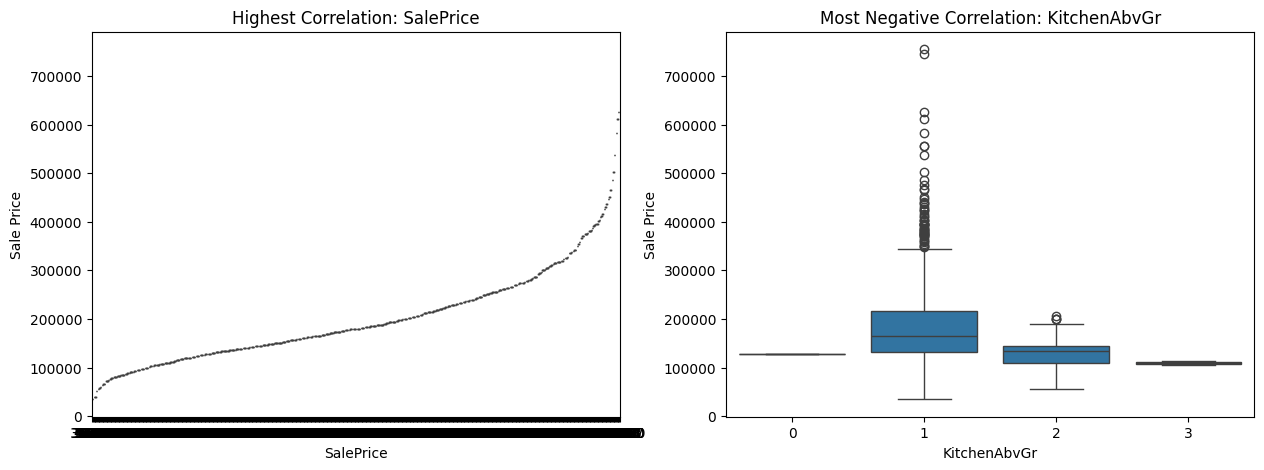

In [30]:
# Replace None with appropriate code

import seaborn as sns
import matplotlib.pyplot as plt

numeric_df = df.select_dtypes(include=['number'])
corr = numeric_df.corr()

highest_corr_col = corr['SalePrice'].idxmax()  
most_neg_corr_col = corr['SalePrice'].idxmin()  

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))

# Plot distribution of column with highest correlation
sns.boxplot(
    x=df[highest_corr_col],
    y=df["SalePrice"],
    ax=ax1
)
# Plot distribution of column with most negative correlation
sns.boxplot(
    x=df[most_neg_corr_col],
    y=df["SalePrice"],
    ax=ax2
)

# Customize labels
ax1.set_title(f"Highest Correlation: {highest_corr_col}")
ax1.set_xlabel(highest_corr_col)
ax1.set_ylabel("Sale Price")
ax2.set_title(f"Most Negative Correlation: {most_neg_corr_col}")
ax2.set_xlabel(most_neg_corr_col)
ax2.set_ylabel("Sale Price");

Interpret the results below. Consult `data/data_description.txt` as needed.

In [32]:
# Replace None with appropriate text
"""
The highest correlation indicates a positive relationship between SalePrice and another variable, meaning as that variable increases, SalePrice likely increases too.
The most negative correlation suggests an inverse relationship with SalePrice, where an increase in that variable is associated with a decrease in sale prices.
"""

'\nThe highest correlation indicates a positive relationship between SalePrice and another variable, meaning as that variable increases, SalePrice likely increases too.\nThe most negative correlation suggests an inverse relationship with SalePrice, where an increase in that variable is associated with a decrease in sale prices.\n'

## 5. Engineer and Explore a New Feature

Here the code is written for you, all you need to do is interpret it.

We note that the data spans across several years of sales:

In [31]:
# Run this cell without changes
df["YrSold"].value_counts().sort_index()

YrSold
2006    314
2007    329
2008    304
2009    338
2010    175
Name: count, dtype: int64

Maybe we can learn something interesting from the age of the home when it was sold. This uses information from the `YrBuilt` and `YrSold` columns, but represents a truly distinct feature.

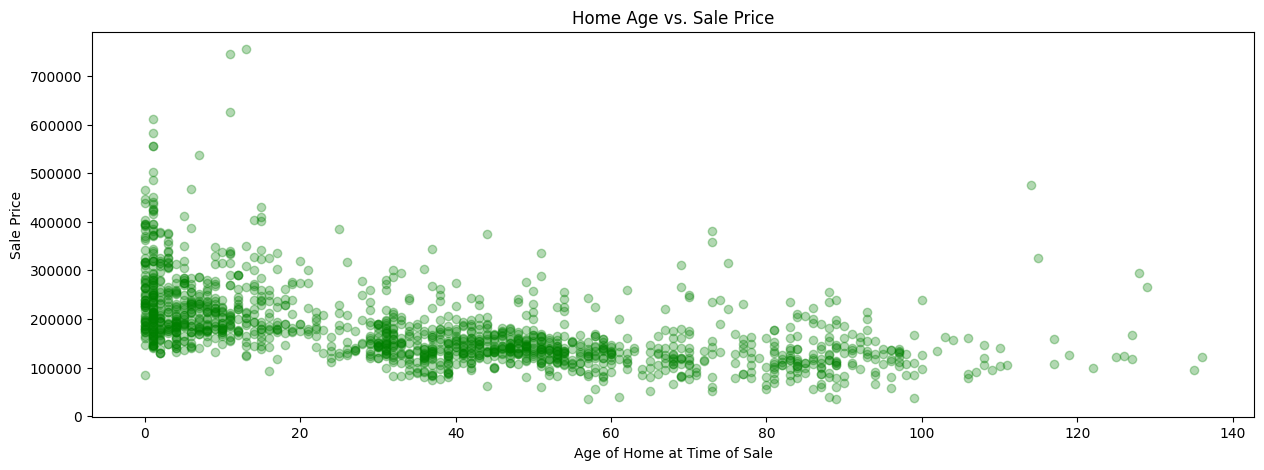

In [33]:
# Run this cell without changes

# Make a new column, Age
df["Age"] = df["YrSold"] - df["YearBuilt"]

# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Plot Age vs. SalePrice
ax.scatter(df["Age"], df["SalePrice"], alpha=0.3, color="green")
ax.set_title("Home Age vs. Sale Price")
ax.set_xlabel("Age of Home at Time of Sale")
ax.set_ylabel("Sale Price");

Interpret this plot below:

In [35]:
# Replace None with appropriate text
"""
General Trend
The plot appears to show a negative trend: As the age of the home increases, the sale price tends to decrease.
For newer homes (low values on the x-axis), there is a wider spread of sale prices, but generally, newer homes are more likely to have higher sale prices.
Older homes (higher values on the x-axis) tend to have lower sale prices, though there are still some exceptions where older homes fetch higher prices.

Clustering
Homes with ages around 10-30 years tend to have sale prices clustered between $100,000 and $250,000.
"""

'\nGeneral Trend\nThe plot appears to show a negative trend: As the age of the home increases, the sale price tends to decrease.\nFor newer homes (low values on the x-axis), there is a wider spread of sale prices, but generally, newer homes are more likely to have higher sale prices.\nOlder homes (higher values on the x-axis) tend to have lower sale prices, though there are still some exceptions where older homes fetch higher prices.\n\nClustering\nHomes with ages around 10-30 years tend to have sale prices clustered between $100,000 and $250,000.\n'

## Summary

Congratulations, you've completed an exploratory data analysis of a popular dataset. You saw how to inspect the distributions of individual columns, subsets of columns, correlations, and new engineered features.